In [7]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams


# Logistic Regression

<div class="span5 alert alert-info">
<p>Logistic regression is a probabilistic model that links observed binary data to a set of features.</p>

<p>Suppose that we have a set of binary (that is, taking the values 0 or 1) observations Y<sub>1</sub>....Y<sub>n</sub>, and for each observation Y<sub>i</sub> we have a vector of features X<sub>i</sub>. The logistic regression model assumes that there is some set of <b>weights</b>, <b>coefficients</b>, or <b>parameters</b> &#946;.
<br>
<p>When we <b>fit</b> a logistic regression model, we determine values for each &#946; that allows the model to best fit the <b>training data</b> we have observed. Once we do this, we can use these coefficients to make predictions about data we have not yet observed.</p>

</div>

From http://www.edwardtufte.com/tufte/ebooks, in "Visual and Statistical Thinking: 
Displays of Evidence for Making Decisions":

>On January 28, 1986, the space shuttle Challenger exploded and seven astronauts died because two rubber O-rings leaked. These rings had lost their resiliency because the shuttle was launched on a very cold day. Ambient temperatures were in the low 30s and the O-rings themselves were much colder, less than 20F.

>One day before the flight, the predicted temperature for the launch was 26F to 29F. Concerned that the rings would not seal at such a cold temperature, the engineers who designed the rocket opposed launching Challenger the next day.

But they did not make their case persuasively, and were over-ruled by NASA.

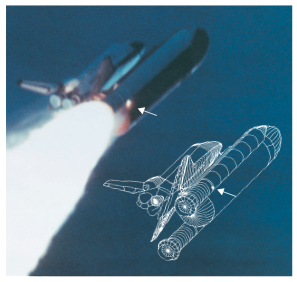

In [8]:
from IPython.display import Image as Im
from IPython.display import display
Im('./shuttle.png')

The image above shows the leak, where the O-ring failed.

We have here data on previous failures of the O-rings at various temperatures.

In [26]:
# Lets import the dataset which is in txt format.
data = pd.read_csv('challenge.txt', sep='\\s+', header=None, names=['Temperature', 'Pass/Fail'])

# Display the first 5 rows of the dataset
data.head()


,Temperature,Pass/Fail
0,66,0
1,70,1
2,69,0
3,68,0
4,67,0


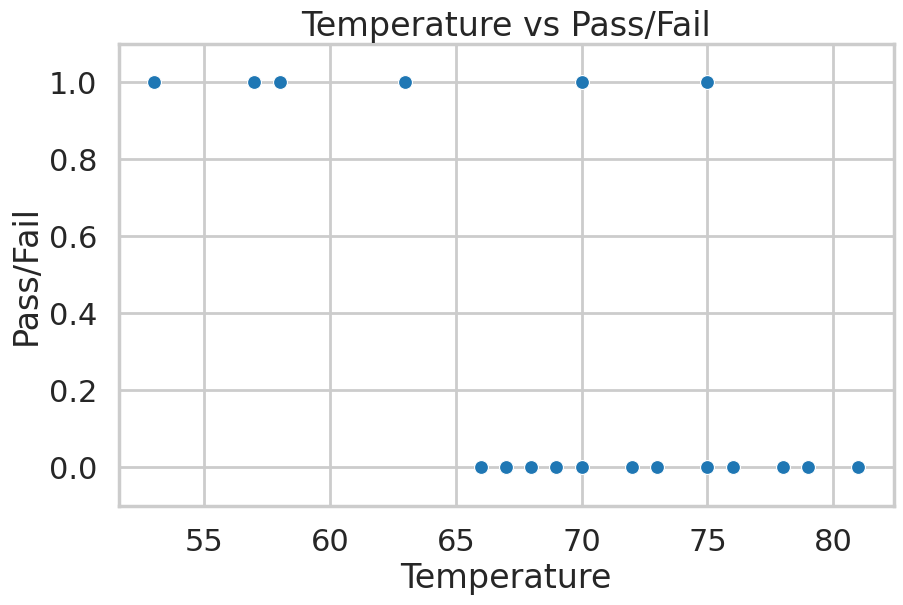

In [27]:
# Plotting the data to visualise the relationship between Temperature and Pass/Fail

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Pass/Fail', data=data, s=100)
plt.title('Temperature vs Pass/Fail')
plt.xlabel('Temperature')
plt.ylabel('Pass/Fail')
plt.ylim(-0.1, 1.1)
plt.show()

## Plot using logistic regression model

In [ ]:
#We are using skikit-learn's LogisticRegression model to fit the data.
# Importing the LogisticRegression model
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression()

# Reshaping the data for sklearn
X = data['Temperature'].values.reshape(-1, 1)
y = data['Pass/Fail'].values

# Fitting the model
model.fit(X, y)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [32]:
#Score the model
score = model.score(X, y)
print(f'Model Accuracy: {score*100:.2f}%')

Model Accuracy: 86.96%


# Predictions

 Lets use the model to predict Pass/Fail results for various temperatures.

In [43]:
#Create a range of 1000 values between min and max temperature for plotting the logistic curve
X_test = np.linspace(data['Temperature'].min(), data['Temperature'].max(), 1000).reshape(-1, 1)

#Show the first 20 values of X_test
X_test[:20]

array([[53.        ],
       [53.02802803],
       [53.05605606],
       [53.08408408],
       [53.11211211],
       [53.14014014],
       [53.16816817],
       [53.1961962 ],
       [53.22422422],
       [53.25225225],
       [53.28028028],
       [53.30830831],
       [53.33633634],
       [53.36436436],
       [53.39239239],
       [53.42042042],
       [53.44844845],
       [53.47647648],
       [53.5045045 ],
       [53.53253253]])

In [44]:
# Getting the predicted values for the test data

y_pred = model.predict(X_test)

y_pred  # Display first 10 predicted classes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

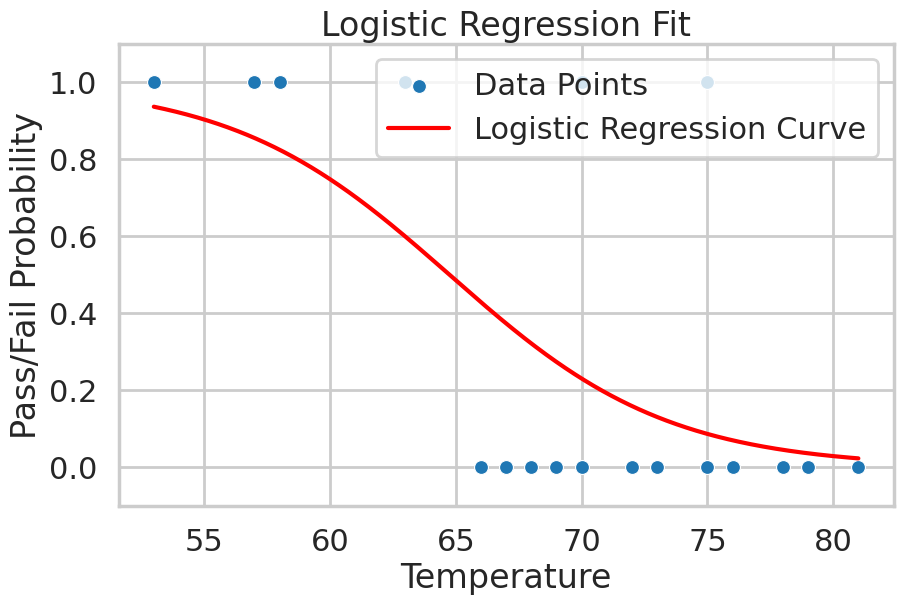

In [45]:
# Plot the data
plt.figure(figsize=(10,6))
sns.scatterplot(x='Temperature', y='Pass/Fail', data=data, s=100
                , label='Data Points')
plt.plot(X_test, model.predict_proba(X_test)[:, 1], color='red', label='Logistic Regression Curve')
plt.title('Logistic Regression Fit')
plt.xlabel('Temperature')
plt.ylabel('Pass/Fail Probability')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()